In [39]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import os
print(os.getcwd())

c:\Users\79511\OneDrive\Документы\GitHub\Labs_Zalipaev\lab_5


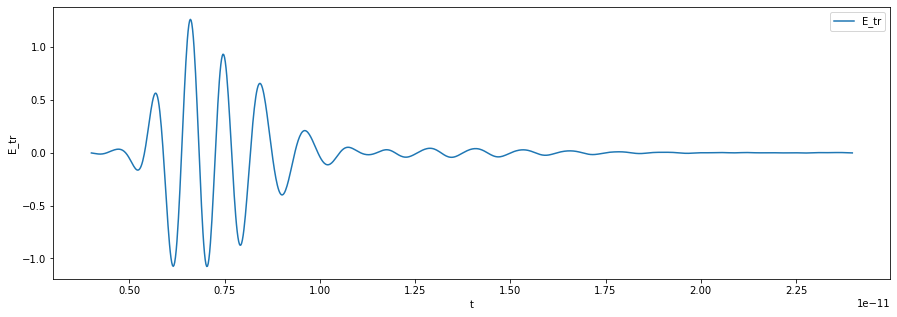

In [40]:
data = pd.read_csv('epsdata.txt', delimiter=' ', dtype=float, names=['time', 'field'])
time_array = data['time'] * 10 ** -12
E_tr = data['field']
plt.figure(figsize=(15, 5))
plt.plot(time_array, E_tr, label='E_tr')
plt.xlabel('t')
plt.ylabel('E_tr')
plt.legend()

In [41]:
z = 1e-3
c = 3e8
t_p = 0.5e-12
d = 1e-3
f_min = 0.5e12
f_max = 1.5e12
division_number = 100
f_array = np.linspace(f_min, f_max, division_number, dtype=float)
w_array = 2 * np.pi * f_array
F_w = np.zeros_like(f_array, dtype=float)
f_0 = 1e12
w_0 = 2 * np.pi * f_0
n_0 = 1

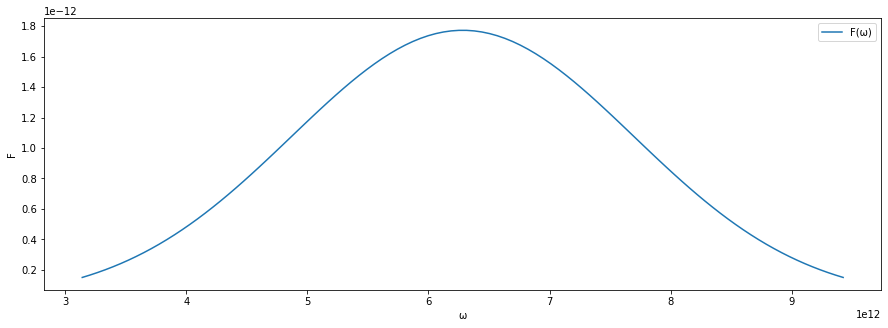

In [42]:
def F(w_array):
    for i in range(len(w_array)):
        F_w[i] = 2 * np.sqrt(np.pi) * t_p * np.exp(-(w_array[i] - w_0) ** 2 * t_p ** 2)
    return F_w

plt.figure(figsize=(15, 5))
plt.plot(w_array, F(w_array), label='F(\u03C9)')
plt.xlabel('\u03C9')
plt.ylabel('F')
plt.legend()

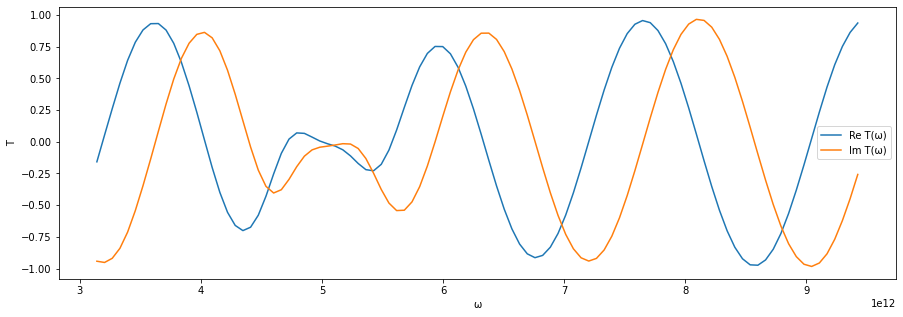

In [43]:
T_w = np.zeros_like(w_array, dtype=complex)

def T(w_array):
  for i in range(0, len(w_array)):
    e = 0
    for n in range(1, len(time_array)):
      e = e+(time_array[n]-time_array[n-1])*(np.exp(1j*w_array[i]*time_array[n-1])*E_tr[n-1]+np.exp(1j*w_array[i]*time_array[n])*E_tr[n])
      T_w[i]=(1/F_w[i])*np.exp(-1j*w_array[i]*z/c)*(1/2)*e
  return T_w

figure, fig = plt.subplots(figsize=(15, 5))
plt.plot(w_array, T(w_array).real, label='Re T(\u03C9)')
plt.plot(w_array, T(w_array).imag, label='Im T(\u03C9)')
plt.xlabel('\u03C9')
plt.ylabel('T')
fig.legend()

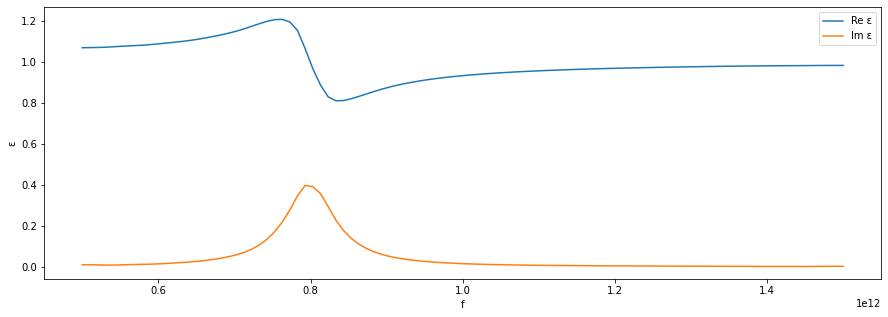

In [51]:
n_array = np.zeros_like(w_array, dtype=complex)
e_array = np.zeros_like(w_array, dtype=complex)

def epsilon(w_array):
  for i in range(len(w_array)):
    k_0 = w_array[i] / c
    n = 1
    F_n = (4 * n) / ((n + 1) ** 2 * np.exp(-1j * k_0 * n * d) - (n - 1) ** 2 * np.exp(1j * k_0 * n * d)) - T_w[i]
    while np.abs(F_n.real) > 10 ** -6:
      FFn = 4 * ((n + 1) * np.exp(-1j * k_0 * n * d) * (1 - n + 1j * k_0 * n * d * (n + 1)) + (n - 1) * np.exp(1j * k_0 * n * d) * (n + 1 + 1j * k_0 * n * d * (n - 1)))
      n = n - F_n * (((n + 1) ** 2 * np.exp(-1j * k_0 * n * d) - (n - 1) ** 2 * (np.exp(1j * k_0 * n * d))) ** 2) / FFn
      F_n = (4 * n) / ((n + 1) ** 2 * np.exp(-1j * k_0 * n * d) - (n - 1) ** 2 * np.exp(1j * k_0 * n * d)) - T_w[i]
    n_array[i] = n
    e_array[i] = n_array[i] ** 2
  return e_array

figure, fig = plt.subplots(figsize=(15, 5))
plt.plot(f_array, epsilon(w_array).real, label ='Re \u03B5')
plt.plot(f_array, epsilon(w_array).imag, label ='Im \u03B5')
plt.xlabel('f')
plt.ylabel('\u03B5')
fig.legend()